In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import tensorflow as tf


In [ ]:
!unzip "/content/drive/Shareddrives/Course1ARam/ESAData/Active/ESACCI-SOILMOISTURE-L3S-SSMS-ACTIVE_1991-2019-v05.2.zip"

Streaming output truncated to the last 5000 lines.
  inflating: active/2006/ESACCI-SOILMOISTURE-L3S-SSMS-ACTIVE-20060508000000-fv05.2.nc  
  inflating: active/2006/ESACCI-SOILMOISTURE-L3S-SSMS-ACTIVE-20060509000000-fv05.2.nc  
  inflating: active/2006/ESACCI-SOILMOISTURE-L3S-SSMS-ACTIVE-20060510000000-fv05.2.nc  
  inflating: active/2006/ESACCI-SOILMOISTURE-L3S-SSMS-ACTIVE-20060511000000-fv05.2.nc  
  inflating: active/2006/ESACCI-SOILMOISTURE-L3S-SSMS-ACTIVE-20060512000000-fv05.2.nc  
  inflating: active/2006/ESACCI-SOILMOISTURE-L3S-SSMS-ACTIVE-20060513000000-fv05.2.nc  
  inflating: active/2006/ESACCI-SOILMOISTURE-L3S-SSMS-ACTIVE-20060514000000-fv05.2.nc  
  inflating: active/2006/ESACCI-SOILMOISTURE-L3S-SSMS-ACTIVE-20060515000000-fv05.2.nc  
  inflating: active/2006/ESACCI-SOILMOISTURE-L3S-SSMS-ACTIVE-20060516000000-fv05.2.nc  
  inflating: active/2006/ESACCI-SOILMOISTURE-L3S-SSMS-ACTIVE-20060517000000-fv05.2.nc  
  inflating: active/2006/ESACCI-SOILMOISTURE-L3S-SSMS-ACTIVE-20060518

In [ ]:
!unzip "/content/drive/Shareddrives/Course1ARam/ESAData/Passive/ESACCI-SOILMOISTURE-L3S-SSMV-PASSIVE_1978-2019-v05.2.zip"

In [ ]:
!pip install "xarray[complete]"
!pip install netCDF4
import numpy as np
import os
import matplotlib.pyplot as plt
import pickle
import datetime
import netCDF4 as nc4
!pip install esa_cci_sm
import os
from datetime import datetime
from esa_cci_sm.interface import CCI_SM_025Img,CCI_SM_025Ds
import numpy.testing as nptest
import cv2
import tensorflow as tf

     |████████████████████████████████| 4.7MB 10.6MB/s 
     |████████████████████████████████| 317kB 52.4MB/s 
     |████████████████████████████████| 40kB 2.5MB/s 
     |████████████████████████████████| 737kB 15.4MB/s 
     |████████████████████████████████| 81kB 5.7MB/s 
     |████████████████████████████████| 3.2MB 22.0MB/s 
     |████████████████████████████████| 6.5MB 38.6MB/s 
     |████████████████████████████████| 215kB 42.6MB/s 
  Created wheel for pynetcf: filename=pynetcf-0.2.2-py2.py3-none-any.whl size=25223 sha256=cecffdbf814f1cbcf75c8aff88c733027f0f4ead852de0ac6ad97efd45c8b73f
  Stored in directory: /root/.cache/pip/wheels/ff/45/eb/09dc1960e0ce8b10fd3e96cbef2d9abf99cad96c5daf177d95
  Created wheel for pygeobase: filename=pygeobase-0.4.0-py2.py3-none-any.whl size=14797 sha256=5f3d6a7faa31e0fac177d1e1cd66368be2c42c22874c23437120caed65b5cdab
  Stored in directory: /root/.cache/pip/wheels/66/d1/e7/da7b98aa6ee9f0ad568d8ace195c3f881501d7cfa9f7526ded
  Created wheel for smecv-

In [ ]:
import xarray as xr

In [ ]:
ds_disk = xr.open_dataset("/content/active/2011/ESACCI-SOILMOISTURE-L3S-SSMS-ACTIVE-20110104000000-fv05.2.nc")
ds_disk

<xarray.Dataset>
Dimensions:         (lat: 720, lon: 1440, time: 1)
Coordinates:
  * lat             (lat) float32 89.875 89.625 89.375 ... -89.625 -89.875
  * lon             (lon) float32 -179.875 -179.625 -179.375 ... 179.625 179.875
  * time            (time) datetime64[ns] 2011-01-04
Data variables:
    t0              (time, lat, lon) datetime64[ns] ...
    sm              (time, lat, lon) float32 ...
    sm_uncertainty  (time, lat, lon) float32 ...
    dnflag          (time, lat, lon) float32 ...
    flag            (time, lat, lon) float32 ...
    freqbandID      (time, lat, lon) float32 ...
    mode            (time, lat, lon) float32 ...
    sensor          (time, lat, lon) float32 ...
Attributes:
    title:                      ESA CCI Surface Soil Moisture merged ACTIVE P...
    institution:                Technical University of Vienna (AUT); VanderS...
    contact:                    cci_sm_contact@eodc.eu
    source:                     WARP 5.5R1.1/AMI-WS/ERS12 Level 2 Soil Moistu...
    platform:                   ERS-1, ERS-2, METOP-A, METOP-B
    sensor:                     AMI-WS, ASCAT-A, ASCAT-B
    references:                 http://www.esa-soilmoisture-cci.org; Dorigo, ...
    product_version:            05.2
    id:                         ESACCI-SOILMOISTURE-L3S-SSMS-ACTIVE-201101040...
    tracking_id:                9dd7ed21-fcb2-4056-ba3f-ca0bcb30d196
    Conventions:                CF-1.6
    standard_name_vocabulary:   NetCDF Climate and Forecast (CF) Metadata Con...
    summary:                    This dataset was produced with funding of the...
    keywords:                   Soil Moisture/Water Content
    naming_authority:           TU Wien
    keywords_vocabulary:        NASA Global Change Master Directory (GCMD) Sc...
    cdm_data_type:              Grid
    comment:                    This dataset was produced with funding of the...
    history:                    2020-02-20 12:00:00 - product produced
    date_created:               20200411T140825Z
    creator_name:               Department of Geodesy and Geoinformation, Tec...
    creator_url:                https://climers.geo.tuwien.ac.at/
    creator_email:              cci_sm_developer@eodc.eu
    project:                    Climate Change Initiative - European Space Ag...
    license:                    Data use is free and open for all registered ...
    time_coverage_start:        19910805T000000Z
    time_coverage_end:          20191231T235959Z
    time_coverage_duration:     P28Y
    time_coverage_resolution:   P1D
    geospatial_lat_min:         -90.0
    geospatial_lat_max:         90.0
    geospatial_lon_min:         -180.0
    geospatial_lon_max:         180.0
    geospatial_vertical_min:    0.0
    geospatial_vertical_max:    0.0
    geospatial_lat_units:       degrees_north
    geospatial_lon_units:       degrees_east
    geospatial_lat_resolution:  0.25 degree
    geospatial_lon_resolution:  0.25 degree
    spatial_resolution:         25km

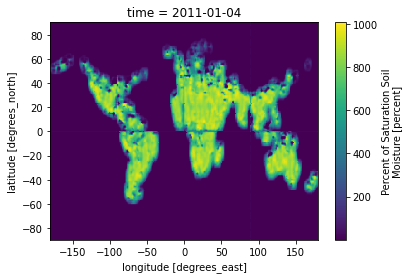

In [ ]:
values = ds_disk["sm"]
values.data.shape
values.data = x.reshape(1,720,1440)
values[:500, ::3, ::3].plot()


In [ ]:
print(np.amax(x))

91.57354736328125


In [ ]:
values.to_netcdf('360-autoencoded20110104000000.nc')

In [ ]:
np.amax(x)
#for i in range(720):
 # for j in range(1440):
  #  value = x[0][i][j] 
   # if value < 0:
      #x[0][i][j] = np.nan
#-9998.999997286988
for id in range(720):
  for y in range(1440):
    x[id][y] = x[id][y]*100

# Data Testing


Import Python Libraries
Install netCDF4

Store and convert netCDF4 into array


In [ ]:
#@title

with nc4.Dataset( "/content/active/1991/ESACCI-SOILMOISTURE-L3S-SSMS-ACTIVE-19910807000000-fv05.2.nc", mode='r') as ncfid:
     lat    = ncfid.variables['lat'][:]
     lon    = ncfid.variables['lon'][:]
     time = ncfid.variables['time'][:]

     # Print variable information
     print (time)


[7888.]


In [ ]:
#@title
with nc4.Dataset("/content/active/2009/ESACCI-SOILMOISTURE-L3S-SSMS-ACTIVE-20090103000000-fv05.2.nc", mode='r') as ncfid:
     for name, var in ncfid.variables.items():
         print("{}:".format(name))
         print("{:>20}: {}".format("Dimension", var.dimensions))
         print("{:>20}: {}".format("Dimension value", var.shape))
         print("{:>20}: {}".format("Type", var.dtype))
         for attr in var.ncattrs():
             print("{:>20}: {}".format(attr, var.getncattr(attr)))

In [ ]:
# read several parameters
parameter = ['sm']
# the class is initialized with the exact filename.

img = CCI_SM_025Img("/content/ESACCI-SOILMOISTURE-L3S-SSMS-ACTIVE-19910831000000-fv05.2.nc", parameter=parameter)
# reading returns an image object which contains a data dictionary
# with one array per parameter. The returned data is a global 0.25 degree
# image/array.
image = img.read()
array = img.read().data.get('sm')
print(array.shape)
grid1 = array


import cv2
res = cv2.resize(array, dsize=(1440, 720), interpolation=cv2.INTER_CUBIC)
count = 0
percent = []
for x in range(0, 720, 120):
  for y in range (0, 1440,120):
    count = 0
    for i in range(x, x+120):
      for j in range (y, y + 120):
        if (res[i][j]> -9999):
          count = count + 1
    percentage = count/14400
    percent.append(percentage)
print('percentage covered')
print(percent)

print("median")
median = np.median(percent)
print(median)

(1440, 720)
percentage covered
[0.13854166666666667, 0.26222222222222225, 0.206875, 0.333125, 0.29354166666666665, 0.39361111111111113, 0.24840277777777778, 0.27597222222222223, 0.2875, 0.20847222222222223, 0.24055555555555555, 0.23958333333333334, 0.08944444444444444, 0.5104861111111111, 0.12118055555555556, 0.33493055555555556, 0.6781944444444444, 0.25027777777777777, 0.7876388888888889, 0.358125, 0.35097222222222224, 0.13645833333333332, 0.010277777777777778, 0.052569444444444446, 0.09381944444444444, 0.43020833333333336, 0.29875, 0.1554861111111111, 0.07791666666666666, 0.04055555555555555, 0.3351388888888889, 0.16166666666666665, 0.020694444444444446, 0.0, 0.0, 0.175625, 0.016805555555555556, 0.08569444444444445, 0.35986111111111113, 0.0, 0.0, 0.0, 0.036319444444444446, 0.2, 0.47180555555555553, 0.18048611111111112, 0.005833333333333334, 0.0, 0.0, 0.023125, 0.0018055555555555555, 0.0, 0.0, 0.0, 0.0, 0.1346527777777778, 0.09965277777777778, 0.0811111111111111, 0.015416666666666667,

In [ ]:
new_list = []
for x in range(0, 720, 120):
  for y in range (0, 1440,120):
    count = 0
    for i in range(x, x+120):
      for j in range (y, y + 120):
        if (res[i][j]> -9999):
          count = count + 1
    percentage = count/14400
    if (percentage > median):
      new_list.append([percentage, y, x])
print(new_list)


[[0.13854166666666667, 0, 0], [0.26222222222222225, 120, 0], [0.206875, 240, 0], [0.333125, 360, 0], [0.29354166666666665, 480, 0], [0.39361111111111113, 600, 0], [0.24840277777777778, 720, 0], [0.27597222222222223, 840, 0], [0.2875, 960, 0], [0.20847222222222223, 1080, 0], [0.24055555555555555, 1200, 0], [0.23958333333333334, 1320, 0], [0.08944444444444444, 0, 120], [0.5104861111111111, 120, 120], [0.12118055555555556, 240, 120], [0.33493055555555556, 360, 120], [0.6781944444444444, 480, 120], [0.25027777777777777, 600, 120], [0.7876388888888889, 720, 120], [0.358125, 840, 120], [0.35097222222222224, 960, 120], [0.13645833333333332, 1080, 120], [0.09381944444444444, 0, 240], [0.43020833333333336, 120, 240], [0.29875, 240, 240], [0.1554861111111111, 360, 240], [0.3351388888888889, 720, 240], [0.16166666666666665, 840, 240], [0.175625, 1320, 240], [0.08569444444444445, 120, 360], [0.35986111111111113, 240, 360], [0.2, 840, 360], [0.47180555555555553, 960, 360], [0.18048611111111112, 108

In [ ]:
sm_good_list = []
for a in new_list:
  x = a[2]
  y = a[1]
  sm_good_list.append([res[x:x+120,y:y+120]])


In [ ]:
print((sm_good_list[1][0]))

[[ -9999.        -9999.        -9999.       ...  -9999.
   -9999.        -9999.      ]
 [ -9999.        -9999.        -9999.       ...  -9999.
   -9999.        -9999.      ]
 [ -9999.        -9999.        -9999.       ...  -9999.
   -9999.        -9999.      ]
 ...
 [   471.70993     -45.240803     23.8027   ...  -4961.322
   -4960.73      -4959.1504  ]
 [  -360.0937     1652.2288     1301.9553   ...  -4963.3643
   -4965.1777    -4964.852   ]
 [ -4967.9185    -5177.6665    -5596.651    ... -11153.148
  -11572.673     -9590.514   ]]


In [ ]:
a = np.asarray(sm_good_list)
print(a.shape)
q,w,e,r = a.shape
print(q)

(36, 1, 120, 120)
36


In [ ]:
b = []
for i in range(q):
  b.append(np.asarray(a[i][0]))
y = np.asarray(b)
print(y[0][0])
y[0][0] = monthOfESACCIFile('/content/ESACCI-SOILMOISTURE-L3S-SSMS-ACTIVE-19910831000000-fv05.2.nc')
print(y[0][0])
print(y.shape)

In [ ]:
c = []
for i in range(q):
  c.append(np.asarray(b[2][i]))
z = np.asarray(c)
print(z.shape)

(36, 120)


In [ ]:
import matplotlib.pyplot as plt
import tensorflow as tf


In [ ]:
for i in range(36):
  plt.imshow((y[i]))
  plt.show()


plt.imshow(res)
plt.show()
print(type(res))

In [ ]:
print(image)
print(image.data)

{'sm': array([[-9999., -9999., -9999., ..., -9999., -9999., -9999.],
       [-9999., -9999., -9999., ..., -9999., -9999., -9999.],
       [-9999., -9999., -9999., ..., -9999., -9999., -9999.],
       ...,
       [-9999., -9999., -9999., ..., -9999., -9999., -9999.],
       [-9999., -9999., -9999., ..., -9999., -9999., -9999.],
       [-9999., -9999., -9999., ..., -9999., -9999., -9999.]],
      dtype=float32)}


In [ ]:
nc_file = "/content/active/2019/ESACCI-SOILMOISTURE-L3S-SSMS-ACTIVE-20190214000000-fv05.2.nc"


In [ ]:
# Open the netCDF file and read surface air temperature
with nc4.Dataset(nc_file,'r') as ncid:
     lons      = ncid.variables['lon'][:] # longitude grid points
     lats      = ncid.variables['lat'][:] # latitude grid points
     soil_moisture = ncid.variables['sm'][:]
     

In [ ]:
!apt-get install libproj-dev proj-data proj-bin
!apt-get install libgeos-dev
!pip install cython
!pip install cartopy

Reading package lists... Done
Building dependency tree       
Reading state information... Done
libproj-dev is already the newest version (4.9.3-2).
libproj-dev set to manually installed.
proj-data is already the newest version (4.9.3-2).
proj-data set to manually installed.
The following NEW packages will be installed:
  proj-bin
0 upgraded, 1 newly installed, 0 to remove and 29 not upgraded.
Need to get 32.3 kB of archives.
After this operation, 110 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 proj-bin amd64 4.9.3-2 [32.3 kB]
Fetched 32.3 kB in 0s (109 kB/s)
Selecting previously unselected package proj-bin.
(Reading database ... 160975 files and directories currently installed.)
Preparing to unpack .../proj-bin_4.9.3-2_amd64.deb ...
Unpacking proj-bin (4.9.3-2) ...
Setting up proj-bin (4.9.3-2) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...
Reading package lists... Done
Building dependency tree       
Reading state 

In [ ]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import cm

import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter

In [ ]:
fig = plt.figure(figsize=(9, 5))
map_projection = ccrs.PlateCarree()
ax = fig.add_subplot(1, 1, 1, projection=map_projection)

im = ax.contourf(lons, lats, soil_moisture[0,:,:], transform=map_projection)
ax.coastlines()

ax.set_xticks(np.linspace(-180, 180, 5), crs=map_projection)
ax.set_yticks(np.linspace(-90, 90, 5), crs=map_projection)
lon_formatter = LongitudeFormatter(zero_direction_label=True)
lat_formatter = LatitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)

cb = fig.colorbar(im, orientation='vertical', shrink=0.75)

ax.set_global()
plt.show()

/usr/local/lib/python3.7/dist-packages/cartopy/io/__init__.py:260: DownloadWarning: Downloading: https://naciscdn.org/naturalearth/110m/physical/ne_110m_coastline.zip
  warnings.warn('Downloading: {}'.format(url), DownloadWarning)


In [ ]:
#@title
with nc4.Dataset( "/content/ESACCI-SOILMOISTURE-L3S-SSMS-ACTIVE-19910831000000-fv05.2.nc", mode='r') as ncfid:

  time = ncfid.variables['time'][:]
print(time/365)

[21.676712328767124]


# Loading/Preparing Data

In [ ]:
def monthOfESACCIFile(fname):
  a = fname.index("000000-")
  month = fname[a-4:a-2]
  return (int(month))

In [ ]:
#@title
def toDatasetESACCIFile(fname):
  parameter = ['sm']
  img = CCI_SM_025Img(fname, parameter=parameter)
  array = img.read().data.get('sm')
  res = cv2.resize(array, dsize=(1440, 720), interpolation=cv2.INTER_CUBIC)
  count = 0
  percent = []
  for x in range(0, 720, 120):
    for y in range (0, 1440,120):
      count = 0
      for i in range(x, x+120):
        for j in range (y, y + 120):
          if (res[i][j]> -9999):
            count = count + 1
      percentage = count/14400
      percent.append(percentage)
  median = np.median(percent)
  new_list = []
  for x in range(0, 720, 120):
    for y in range (0, 1440,120):
      count = 0
      for i in range(x, x+120):
        for j in range (y, y + 120):
          if (res[i][j]> -9999):
            count = count + 1
      percentage = count/14400
      if (percentage > 0.08):
        new_list.append([percentage, y, x])
  sm_good_list = []
  for a in new_list:
    x = a[2]
    y = a[1]
    arr = res[x:x+120,y:y+120]
    arr[0][0] = month
    sm_good_list.append([arr])
  a = np.asarray(sm_good_list)
  print(a.shape)
  if (a.size > 0):
    q,w,e,r = a.shape
    masterDataset = []
    for i in range(q):
      masterDataset.append(np.asarray(np.asarray(a)[i][0]))
    z = np.asarray(masterDataset)
    z[0][0] = monthOfESACCIFile(fname)
    print(fname+" added")
    print(z.shape)
    return(z)
  else:
    print('unable to add'+fname)

In [ ]:
masterDataset = []

In [ ]:
toDatasetESACCIFileOptimized("/content/active/1997/ESACCI-SOILMOISTURE-L3S-SSMS-ACTIVE-19970103000000-fv05.2.nc")

(2, 1, 240, 240)


In [ ]:
print(np.asarray(masterDataset))

[[[ 1. nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  ...
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]]

 [[ 1. nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  ...
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]]]


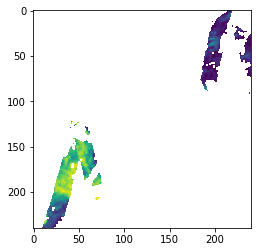

In [ ]:
plt.imshow(np.asarray(masterDataset[0]))
plt.show()

In [ ]:
print(data.shape)

(18, 240, 240)


In [ ]:
def toDatasetESACCIFileOptimized(fname):
  parameter = ['sm']
  img = CCI_SM_025Img(fname, parameter=parameter)
  array = img.read().data.get('sm')
  res = cv2.resize(array, dsize=(1440, 720), interpolation=cv2.INTER_CUBIC)
  count = 0
  threshold_size = 720
  percent = []
  sm_good_list = []
  for x in range(0, 720, threshold_size):
    for y in range (0, 1440,threshold_size):
      arr = res[x:x+threshold_size,y:y+threshold_size]
      sm_good_list.append([arr])
  a = np.asarray(sm_good_list)
  print(a.shape)
  if (a.size > 0):
    q,w,e,r = a.shape
    for i in range(q):
      masterDataset.append(np.asarray(np.asarray(a)[i][0]))
  else:
    print('unable to add '+fname)

In [ ]:
def SeventoDatasetESACCIFileOptimized(fname):
  parameter = ['sm']
  img = CCI_SM_025Img(fname, parameter=parameter)
  array = img.read().data.get('sm')
  res = cv2.resize(array, dsize=(1440, 720), interpolation=cv2.INTER_CUBIC)
  count = 0
  threshold_size = 720
  percent = []
  sm_good_list = []
  arr0 = res[0:720,0:720]
  arr1 = res[0:720,720:1440]
  sm_good_list.append([arr0])
  sm_good_list.append([arr1])
  a = np.asarray(sm_good_list)
  print(a.shape)
  if (a.size > 0):
    q,w,e,r = a.shape
    for i in range(q):
      masterDataset.append(np.asarray(np.asarray(a)[i][0]))
  else:
    print('unable to add '+fname)

In [ ]:
#all active file reading
for i in range(1980,2020):
  for x in os.listdir("/content/passive/"+str(i)):
    SeventoDatasetESACCIFileOptimized("/content/passive/"+str(i)+"/"+x)
    print(np.asarray(masterDataset).shape)
  print("i =")
  print(i)
print("completed")


(2, 1, 720, 720)


NameError: ignored

array([[ 8., nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]], dtype=float32)

In [ ]:
with open('720ThresholdArray.npy', 'wb') as validation_set:
    np.save(validation_set, np.asarray(masterDataset))

In [ ]:
#1991 active file test
i=1994
for x in os.listdir("/content/active/"+str(i)):
  toDatasetESACCIFileOptimized("/content/active/"+str(i)+"/"+x)
  print(np.asarray(masterDataset).shape)
print("i =")
print(i)
print("completed")
with open('array_1991to1994.npy', 'wb') as validation_set:
    np.save(validation_set, np.asarray(masterDataset))

In [ ]:
print(np.asarray(masterDataset).shape)

In [ ]:
#individual file reader
toDatasetESACCIFile("/content/active/1991/ESACCI-SOILMOISTURE-L3S-SSMS-ACTIVE-19910906000000-fv05.2.nc")

/content/active/1991/ESACCI-SOILMOISTURE-L3S-SSMS-ACTIVE-19910906000000-fv05.2.nc added
(36, 120, 120)


In [ ]:
print(monthOfESACCIFile("/content/active/1991/ESACCI-SOILMOISTURE-L3S-SSMS-ACTIVE-19910805000000-fv05.2.nc"))

8


In [ ]:
count = 0
for x in os.listdir("/content/active/1991"):
  count += 1
print(count)


149


In [ ]:
#Total number of images selected for training

total_num_images = 2000

#Select 2000 samples
img_database = np.array(img_database[9:total_num_images])

In [ ]:
with open('/content/drive/Shareddrives/Course1ARam/Training_Form_Data/TrainingForm360Threshold_2015-2019.npy', 'rb') as validation_set:
    a = np.load(validation_set)
print(a[0])

[[10000.     0.     0. ...     0.     0.     0.]
 [    0.     0.     0. ...     0.     0.     0.]
 [    0.     0.     0. ...     0.     0.     0.]
 ...
 [    0.     0.     0. ...     0.     0.     0.]
 [    0.     0.     0. ...     0.     0.     0.]
 [    0.     0.     0. ...     0.     0.     0.]]


In [ ]:
data = np.fromfile("/content/drive/Shareddrives/Course1ARam/Masterdataset_91to98.npy")


# Autoencoder

In [ ]:
import tensorflow as tf
import numpy as np
import os
import matplotlib
import matplotlib.pyplot as plt
import zipfile
import cv2
import time
from keras.layers import Conv2D, Input, Dense, Dropout, MaxPool2D, UpSampling2D
from keras.models import Model
%matplotlib inline

In [ ]:
def FormatArray(array):
  sample, y, x = array.shape
  for i in range(sample):
    for j in range(0,240):
      for k in range(0,240):
        array[i][j][k] += 9999

In [ ]:
with open('/content/drive/Shareddrives/Course1ARam/Arrays/360ThresholdArray_2015-2019.npy', 'rb') as validation_set:
    a = np.load(validation_set)
FormatArray(a)
with open('TrainingForm360Threshold_2015-2019.npy', 'wb') as validation_set:
    np.save(validation_set, a)

In [ ]:
with open('/content/drive/Shareddrives/Course1ARam/120autoencoder/360ThresholdArray_2006-2014.npy', 'rb') as validation_set:
    a = np.load(validation_set)



In [ ]:
with open('/content/drive/Shareddrives/Course1ARam/Arrays/360ThresholdArray_1998-2005.npy', 'rb') as validation_set:
    b = np.load(validation_set)

In [ ]:
print(a[0])

[[10009.     0.     0. ...     0.     0.     0.]
 [    0.     0.     0. ...     0.     0.     0.]
 [    0.     0.     0. ...     0.     0.     0.]
 ...
 [    0.     0.     0. ...     0.     0.     0.]
 [    0.     0.     0. ...     0.     0.     0.]
 [    0.     0.     0. ...     0.     0.     0.]]


In [ ]:
print(a.shape)

(19745, 360, 360)


In [ ]:
print(b.shape)

(5114, 360, 360)


In [ ]:
FormatArray(b)
with open('TrainingForm240Threshold_1999-2007.npy', 'wb') as validation_set:
    np.save(validation_set, b)

In [ ]:
c = np.concatenate((a,b))

In [ ]:
with open('360Threshold1998-2014.npy', 'wb') as validation_set:
    np.save(validation_set, c)


In [ ]:
print(c.shape)

(24859, 360, 360)


In [ ]:
#@title
with open('array_1991to1994.npy', 'wb') as validation_set:
    np.save(validation_set, np.asarray(masterDataset))

In [ ]:
#@title
with open('/content/drive/Shareddrives/Course1ARam/Arrays/DATEFIXEDarray_1999-2007.npy','rb') as validation_set:
  a = np.load(validation_set)

In [ ]:
#@title
FormatArray(a)
print(a[0][0])
with open('TrainingFormData1999to2007.npy', 'wb') as validation_set:
    np.save(validation_set, a)

[10007.     0.     0.     0.     0.     0.     0.     0.     0.     0.
     0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
     0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
     0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
     0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
     0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
     0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
     0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
     0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
     0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
     0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
     0.     0.     0.     0.     0.     0.     0.     0.     0.     0.]


In [ ]:
#@title
with open('TrainingFormData1991to1998.npy', 'wb') as validation_set:
    np.save(validation_set, a)

In [ ]:
#@title
with open('/content/drive/Shareddrives/Course1ARam/Arrays/DATEFIXEDarray_1999-2007.npy','rb') as validation_set:
  b = np.load(validation_set)

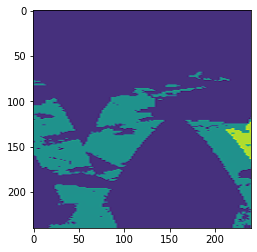

In [ ]:
plt.imshow((c[0]))
plt.show()

In [ ]:
plt.imshow()

In [ ]:
print(np.amax(autoencoder_ready_data))

13866.735


Start of Autoencoder

In [ ]:
with open('/content/drive/Shareddrives/Course1ARam/Training_Form_Data/TrainingForm120Threshold_1991to2007.npy','rb') as validation_set:
  autoencoder_ready_data = np.load(validation_set)

In [ ]:
with open('/content/drive/Shareddrives/Course1ARam/120autoencoder/240train.npy','rb') as validation_set:
  train = np.load(validation_set)

In [ ]:
print(np.amax(autoencoder_ready_data))

13866.735


In [ ]:
autoencoder_ready_data.shape

(181845, 120, 120)

In [ ]:
with open('testPart1.npy', 'wb') as validation_set:
    np.save(validation_set, train)

In [ ]:
#Total number of images selected for training
total_sm_training = 60000
box_dimension = 120
max_value = np.amax(autoencoder_ready_data)
max = 13866.735

In [ ]:
#Select samples
train = np.array(autoencoder_ready_data[0:total_sm_training])
train = train.reshape([-1,120,120,1])/max_value
print(train.shape)
test = np.array(autoencoder_ready_data[total_sm_training:total_sm_training+10000])
test = test.reshape([-1,120,120,1])/max_value
print(test.shape)
train_validation = np.array(autoencoder_ready_data[0:total_sm_training])
train_validation = train_validation.reshape([-1,box_dimension,box_dimension,1])/max_value
print(train_validation.shape)
test_validation = np.array(autoencoder_ready_data[total_sm_training:total_sm_training+10000])
test_validation = test_validation.reshape([-1,box_dimension,box_dimension,1])/max_value
print(test_validation.shape)

(60000, 120, 120, 1)
(10000, 120, 120, 1)
(60000, 120, 120, 1)
(10000, 120, 120, 1)


In [ ]:
train = train.reshape([-1,360,360,1])/13866.735
print(train.shape)

(2500, 360, 360, 1)


In [ ]:
with open('train_gaps.npy', 'wb') as validation_set:
    np.save(validation_set, train_gaps)

In [ ]:
test = np.array(autoencoder_ready_data[45000:45000+9000])


In [ ]:
def bigGaps(train_array):
  q,w,e,r = train_array.shape
  for i in range(q):
    for z in range(random.randrange(23)+20):
        boxX = random.randrange(15) + 10
        boxY = random.randrange(15) + 10
        x = random.randrange(w-boxX)
        y = random.randrange(e-boxY)
        for j in range(x, (x+boxX)):
            for k in range (y, (y+boxY)):
                train_array[i][j][k] = 0. 
  return (train_array)

In [ ]:
test = test.reshape([-1,240,240,1])/13866.735
print(test.shape)

(9000, 240, 240, 1)


In [ ]:
train_validation = np.array(autoencoder_ready_data[0:total_sm_training])
train_validation = train_validation.reshape([-1,box_dimension,box_dimension,1])/max_value
print(train_validation.shape)

In [ ]:
FormatArray(np.asarray(masterDataset))
print(np.asarray(masterDataset[0][1]))

[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan]


In [ ]:
test_validation = np.array(autoencoder_ready_data[total_sm_training:total_sm_training+9000])
test_validation = test_validation.reshape([-1,box_dimension,box_dimension,1])/max_value
print(test_validation.shape)

In [ ]:
import random
def gapInESAFile(train_array, number_gaps):
  q,w,e,r = train_array.shape
  for i in range(q):
    for z in range(number_gaps):
      x = random.randrange(w)
      y = random.randrange(e)
      train_array[i][x][y] = 0.
  return (train_array)


In [ ]:
#@title
import random
def gapInSample(train_array, number_gaps):
  w,e,r = train_array.shape
  for i in range(number_gaps):
    x = random.randrange(120)
    y = random.randrange(120)
    train_array[x][y][0] = 0.
  return (train_array)

In [ ]:
# Adding gaps to data
import random
train_gaps =  bigGaps(train)
test_gaps = bigGaps(test)


<function matplotlib.pyplot.show>

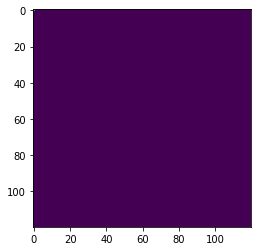

In [ ]:
plt.imshow(train_gaps[2].reshape(120,120))
plt.show

<function matplotlib.pyplot.show>

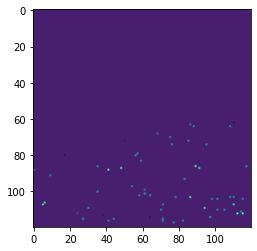

In [ ]:
plt.imshow(train_gaps[2].reshape(box_dimension,box_dimension))
plt.show

<function matplotlib.pyplot.show>

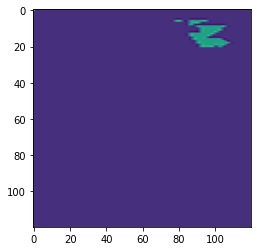

In [ ]:
plt.imshow(test_validation[3].reshape(box_dimension,box_dimension))
plt.show

<function matplotlib.pyplot.show>

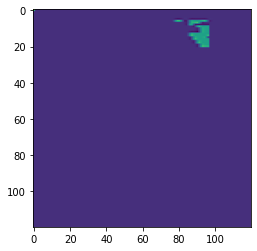

In [ ]:
plt.imshow(test_gaps[3].reshape(box_dimension,box_dimension))
plt.show

In [ ]:
with open('/content/drive/Shareddrives/Course1ARam/120autoencoder/240train.npy','rb') as validation_set:
  train_validation = np.load(validation_set)


In [ ]:
with open('/content/drive/Shareddrives/Course1ARam/240test.npy','rb') as validation_set:
  test_validation = np.load(validation_set)


In [ ]:
with open('/content/drive/Shareddrives/Course1ARam/train_gaps.npy','rb') as validation_set:
  train_gaps = np.load(validation_set)


In [ ]:
with open('/content/drive/Shareddrives/Course1ARam/test_gaps.npy','rb') as validation_set:
  test_gaps = np.load(validation_set)

In [ ]:
#@title
noise = 0.3
train_noise = train + noise * np.random.normal(0, 1, size=train.shape)
test_noise = test + noise * np.random.normal(0, 1, size=test.shape)

train_noise = np.clip(train_noise, 0, 1)
test_noise = np.clip(test_noise, 0, 1)
print(train_noise.shape)
print(test_noise.shape)

In [ ]:
# Encoder 
inputs = Input(shape=(120,120,1))

x = Conv2D(16, 3, activation='relu', padding='same')(inputs)
x = MaxPool2D()(x)
x = Dropout(0.3)(x)
x = Conv2D(16, 3, activation='relu', padding='same')(x)
x = MaxPool2D()(x)
x = Dropout(0.3)(x)
x = Conv2D(16, 3, activation='relu', padding='same')(x)
encoded = MaxPool2D()(x)

In [ ]:
# Decoder

x = Conv2D(16, 3, activation='relu', padding='same')(encoded)
x = UpSampling2D()(x)
x = Dropout(0.3)(x)
x = Conv2D(16, 3, activation='relu', padding='same')(x)
x = UpSampling2D()(x)
x = Dropout(0.3)(x)
x = Conv2D(16, 3, activation='relu', padding='same')(x)
x = UpSampling2D()(x)
decoded = Conv2D(1, 3, activation='sigmoid', padding='same')(x)

In [ ]:
autoencoder = Model(inputs, decoded)
autoencoder.compile(optimizer='rmsprop', loss='mse')

autoencoder.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 120, 120, 1)]     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 120, 120, 16)      160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 60, 60, 16)        0         
_________________________________________________________________
dropout (Dropout)            (None, 60, 60, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 60, 60, 16)        2320      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 30, 30, 16)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 30, 30, 16)        0     

In [ ]:
epochs = 50
batch_size = 256

history = autoencoder.fit(train_gaps,
                train_validation,
                epochs=epochs,
                batch_size=batch_size,
                shuffle=True,
                validation_data=(test_gaps, test_validation)
               )

Epoch 1/50
235/235 [==============================] - 48s 73ms/step - loss: 0.0429 - val_loss: 0.0171
Epoch 2/50
235/235 [==============================] - 17s 70ms/step - loss: 0.0078 - val_loss: 0.0069
Epoch 3/50
235/235 [==============================] - 16s 70ms/step - loss: 0.0060 - val_loss: 0.0059
Epoch 4/50
235/235 [==============================] - 16s 70ms/step - loss: 0.0052 - val_loss: 0.0056
Epoch 5/50
235/235 [==============================] - 16s 70ms/step - loss: 0.0048 - val_loss: 0.0052
Epoch 6/50
235/235 [==============================] - 16s 70ms/step - loss: 0.0045 - val_loss: 0.0053
Epoch 7/50
235/235 [==============================] - 16s 70ms/step - loss: 0.0044 - val_loss: 0.0051
Epoch 8/50
235/235 [==============================] - 17s 70ms/step - loss: 0.0043 - val_loss: 0.0048
Epoch 9/50
235/235 [==============================] - 16s 70ms/step - loss: 0.0042 - val_loss: 0.0049
Epoch 10/50
235/235 [==============================] - 17s 70ms/step - loss: 0.004

In [ ]:
autoencoder.save('120_bottleneck_autoencoder')

INFO:tensorflow:Assets written to: 120_bottleneck_autoencoder/assets


In [ ]:
import h5py
autoencoder.save('my_model.h5')

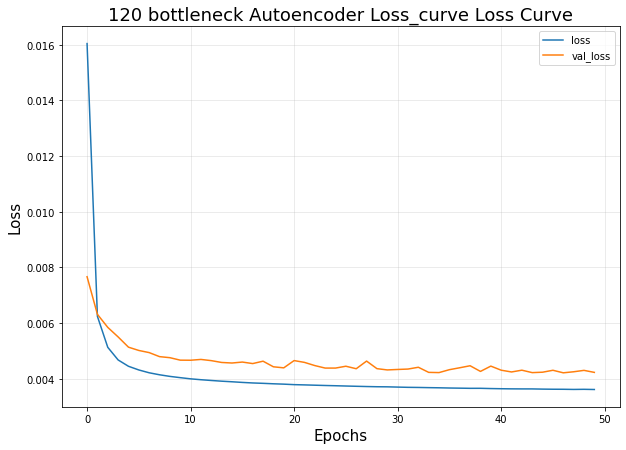

In [ ]:
# Defining Figure
f = plt.figure(figsize=(10,7))
f.add_subplot()

#Adding Subplot
plt.plot(history.epoch, history.history['loss'], label = "loss") # Loss curve for training set
plt.plot(history.epoch, history.history['val_loss'], label = "val_loss") # Loss curve for validation set

plt.title("120 bottleneck Autoencoder Loss_curve Loss Curve",fontsize=18)
plt.xlabel("Epochs",fontsize=15)
plt.ylabel("Loss",fontsize=15)
plt.grid(alpha=0.3)
plt.legend()
plt.savefig("120 bottleneck Autoencoder Loss_curve.png")
plt.show()

In [ ]:
test_autoencoder = autoencoder.predict(b) # predict

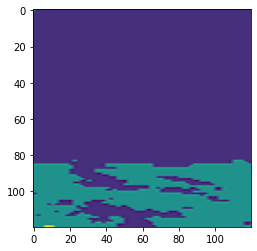

In [ ]:
plt.imshow(test_validation[35].reshape([120,120]))
plt.show()

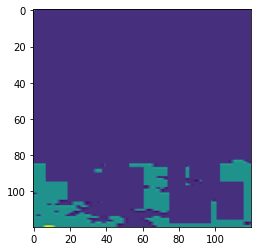

In [ ]:
plt.imshow(test_gaps[35].reshape([120,120]))
plt.show()

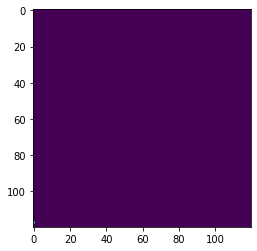

In [ ]:
plt.imshow(test_autoencoder[1].reshape([120,120]))#sample 18 aint so good compared to og
plt.show() 

In [ ]:
# Select few random test images
num_imgs = 16
rand = np.random.randint(1, 1000)
no_gapped = test_validation[rand:rand+num_imgs]
gapped = test_gaps[rand:rand+num_imgs] # slicing
predicted = autoencoder.predict(gapped) # predict

<function matplotlib.pyplot.show>

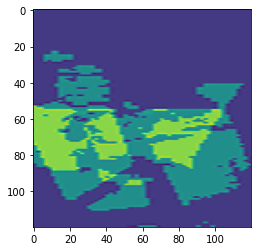

In [ ]:
plt.imshow(no_gapped[1].reshape(120,120))
plt.show

<function matplotlib.pyplot.show>

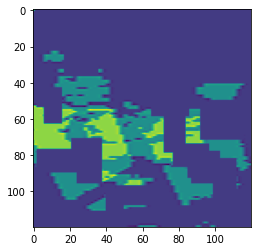

In [ ]:
plt.imshow(gapped[1].reshape(120,120))
plt.show

<function matplotlib.pyplot.show>

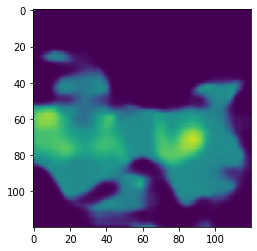

In [ ]:
plt.imshow(predicted[1].reshape(120,120))
plt.show

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


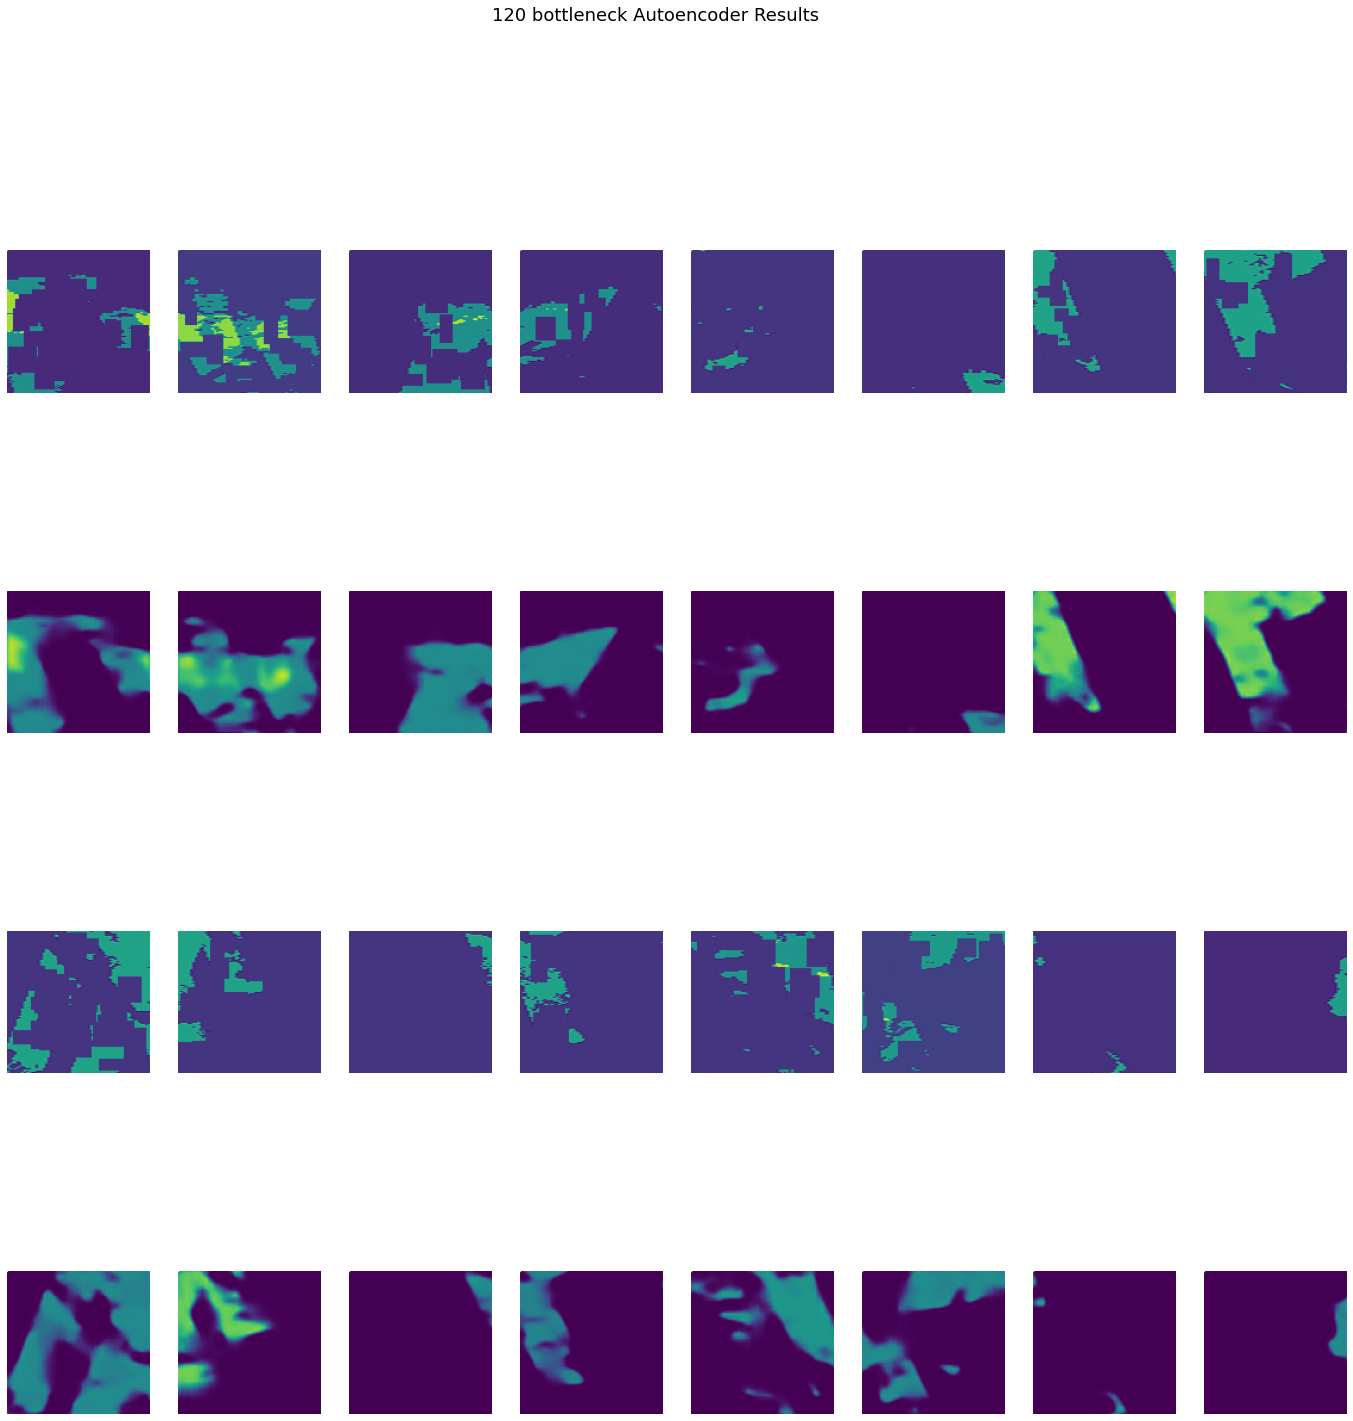

In [ ]:
# Visualize test images with their denoised images

rows = 2 # defining no. of rows in figure
cols = 8 # defining no. of colums in figure
box = 120
f = plt.figure(figsize=(3*cols,4*rows*3)) # defining a figure 

for i in range(rows):
  for j in range(cols): 
    f.add_subplot(rows*2,cols, (2*i*cols)+(j+1)) # adding sub plot to figure on each iteration
    plt.imshow(no_gapped[i*cols + j].reshape([box,box])) 
    plt.axis("off")
  for j in range(cols): 
    f.add_subplot(rows*2,cols, (2*i*cols)+(j+1)) # adding sub plot to figure on each iteration
    plt.imshow(gapped[i*cols + j].reshape([box,box])) 
    plt.axis("off")
  for j in range(cols): 
    f.add_subplot(rows*2,cols,((2*i+1)*cols)+(j+1)) # adding sub plot to figure on each iteration
    plt.imshow(predicted[i*cols + j].reshape([box,box])) 
    plt.axis("off")
        

        
f.suptitle("120 bottleneck Autoencoder Results",fontsize=18)
plt.savefig("autoencoder 120 results.png")

plt.show()

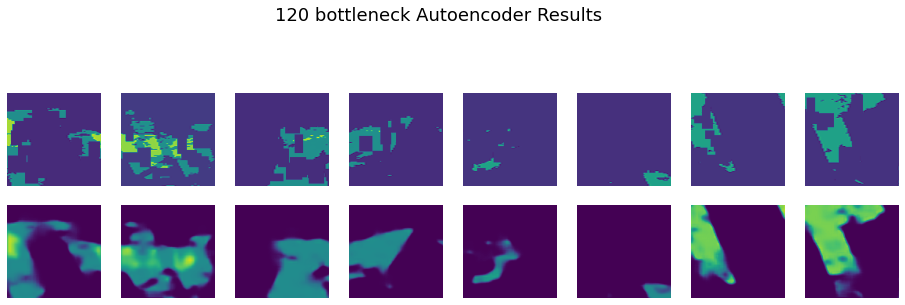

In [ ]:
# Visualize test images with their denoised images

rows = 3 # defining no. of rows in figure
cols = 8 # defining no. of colums in figure
box = 120
f = plt.figure(figsize=(2*cols,2*rows*2)) # defining a figure 

for i in range(1):
  for j in range(cols): 
    f.add_subplot(rows*2,cols, (2*i*cols)+(j+1)) # adding sub plot to figure on each iteration
    plt.imshow(gapped[i*cols + j].reshape([box,box])) 
    plt.axis("off")
  for j in range(cols): 
    f.add_subplot(rows*2,cols,((2*i+1)*cols)+(j+1)) # adding sub plot to figure on each iteration
    plt.imshow(predicted[i*cols + j].reshape([box,box])) 
    plt.axis("off")


        
f.suptitle("120 bottleneck Autoencoder Results",fontsize=18)
plt.savefig("autoencoder 120 results.png")

plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  This is separate from the ipykernel package so we can avoid doing imports until


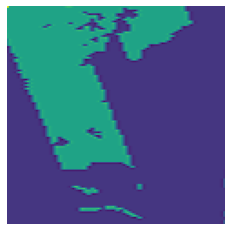

In [ ]:

for j in range(cols): 
  f.add_subplot(rows*2,cols, (2*i*cols)+(j+1)) # adding sub plot to figure on each iteration
  plt.imshow(no_gapped[i*cols + j].reshape([box,box])) 
  plt.axis("off")  

plt.show()

In [ ]:
# Visualize test images with their denoised images

rows = 1 # defining no. of rows in figure
cols = 8 # defining no. of colums in figure
box = 120
f = plt.figure(figsize=(2*cols,2*rows*2)) # defining a figure 

for j in range(cols): 
  f.add_subplot(rows*2,cols, (2*i*cols)+(j+1)) # adding sub plot to figure on each iteration
  plt.imshow(no_gapped[i*cols + j].reshape([box,box])) 
  plt.axis("off")
for j in range(cols): 
  f.add_subplot(rows*2,cols, (2*i*cols)+(j+1)) # adding sub plot to figure on each iteration
  plt.imshow(gapped[i*cols + j].reshape([box,box])) 
  plt.axis("off")        

        
f.suptitle("120 bottleneck Autoencoder Results",fontsize=18)
plt.savefig("autoencoder 120 results.png")

plt.show()

ValueError: ignored

<Figure size 1152x288 with 0 Axes>

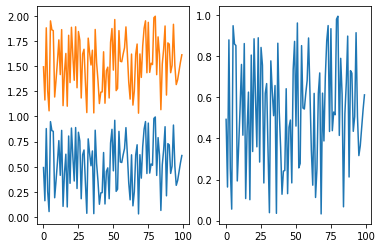

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Generate random data
data = np.random.rand(100)

# Plot in different subplots
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.plot(data)

ax2.plot(data)

ax1.plot(data+1)

plt.show()



```
```

# Clipping Images together

In [ ]:
import tensorflow as tf
import numpy as np
import os
import matplotlib
import matplotlib.pyplot as plt
import zipfile
import cv2
import time
from keras.layers import Conv2D, Input, Dense, Dropout, MaxPool2D, UpSampling2D
from keras.models import Model
%matplotlib inline

In [ ]:
def monthOfESACCIFile(fname):
  a = fname.index("000000-")
  month = fname[a-4:a-2]
  return (int(month))

In [ ]:
# Recreate the exact same model, including its weights and the optimizer
autoencoder_240 = tf.keras.models.load_model('/content/drive/Shareddrives/Course1ARam/240N15Bottleneck/240boxgaps15N_autoencoder')

# Show the model architecture
autoencoder_240.summary()

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 240, 240, 1)]     0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 240, 240, 16)      160       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 120, 120, 16)      0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 120, 120, 16)      0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 120, 120, 16)      2320      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 60, 60, 16)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 60, 60, 16)        2320

In [ ]:
# Recreate the exact same model, including its weights and the optimizer
autoencoder_120 = tf.keras.models.load_model('/content/drive/Shareddrives/Course1ARam/120_bottleneck_autoencoder')

# Show the model architecture
autoencoder_120.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 120, 120, 1)]     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 120, 120, 16)      160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 60, 60, 16)        0         
_________________________________________________________________
dropout (Dropout)            (None, 60, 60, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 60, 60, 16)        2320      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 30, 30, 16)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 30, 30, 16)        0     

In [ ]:
# Recreate the exact same model, including its weights and the optimizer
autoencoder_360 = tf.keras.models.load_model('/content/drive/Shareddrives/Course1ARam/360boxgaps45N_autoencoder.h5')

# Show the model architecture
autoencoder_360.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 360, 360, 1)]     0         
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 360, 360, 16)      160       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 180, 180, 16)      0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 180, 180, 16)      0         
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 180, 180, 16)      2320      
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 90, 90, 16)        0         
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 90, 90, 16)        2320

In [ ]:
masterDataset = []

In [ ]:
def digestFile(fname):
  parameter = ['sm']
  img = CCI_SM_025Img(fname, parameter=parameter)
  array = img.read().data.get('sm')
  res = cv2.resize(array, dsize=(1440, 720), interpolation=cv2.INTER_CUBIC)
  count = 0
  threshold_size = 240
  percent = []
  sm_good_list = []
  for x in range(0, 720, threshold_size):
    for y in range (0, 1440,threshold_size):
        arr = res[x:x+threshold_size,y:y+threshold_size]
        sm_good_list.append([arr])
  a = np.asarray(sm_good_list)
  print(a.shape)
  if (a.size > 0):
    q,w,e,r = a.shape
    for i in range(q):
      masterDataset.append(np.asarray(np.asarray(a)[i][0]))
  else:
    print('unable to add '+fname)

In [ ]:
digestFile("/content/active/2011/ESACCI-SOILMOISTURE-L3S-SSMS-ACTIVE-20110104000000-fv05.2.nc")
print(np.asarray(masterDataset).shape)

NameError: ignored

In [ ]:
data = np.asarray(masterDataset)
print(np.amax(data))

nan


In [ ]:
print(data[1])

[[ 1. nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]


In [ ]:
sample,x,y = data.shape
for j in range(sample):
  for k in range(x):
    for l in range(y):
      if (np.isnan(data[j][k][l]) == True):
        data[j][k][l]=-9999.
print(np.amax(data))

100.0


In [ ]:
print(data[0])

[[ 1.000e+00 -9.999e+03 -9.999e+03 ... -9.999e+03 -9.999e+03 -9.999e+03]
 [-9.999e+03 -9.999e+03 -9.999e+03 ... -9.999e+03 -9.999e+03 -9.999e+03]
 [-9.999e+03 -9.999e+03 -9.999e+03 ... -9.999e+03 -9.999e+03 -9.999e+03]
 ...
 [-9.999e+03 -9.999e+03 -9.999e+03 ... -9.999e+03 -9.999e+03 -9.999e+03]
 [-9.999e+03 -9.999e+03 -9.999e+03 ... -9.999e+03 -9.999e+03 -9.999e+03]
 [-9.999e+03 -9.999e+03 -9.999e+03 ... -9.999e+03 -9.999e+03 -9.999e+03]]


In [ ]:
#plt.imshow(data[9])
#plt.show
hs = -9999
for x in range(240):
  for y in range(240):
    if data[9][x][y] > hs:
      hs = data[9][x][y]
print(hs)
np.amin(data)

[1.]


0.0

In [ ]:
def FormatArray(array):
  sample, y, x = array.shape
  for i in range(sample):
    for j in range(0,y):
      for k in range(0,x):
        array[i][j][k] += 9999

In [ ]:
def deFormatArray(array):
  sample, y, x, o = array.shape
  for i in range(sample):
    for j in range(0,y):
      for k in range(0,x):
        array[i][j][k] -= 9999

In [ ]:
FormatArray(data)
print(np.amax(data))

10099.0


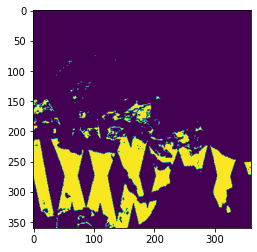

In [ ]:
plt.imshow(data[2].reshape(360,360))
plt.show()

In [ ]:
data = data.reshape([-1,360,360,1])/(np.amax(data))

In [ ]:
print(np.amax(data))

1.0


In [ ]:
predicted_360 = autoencoder_360.predict(data) 

In [ ]:
print(np.amax(predicted_360))

0.9157355


In [ ]:
predicted_120 = autoencoder_120.predict(data)

In [ ]:
deFormatArray(predicted_360)

In [ ]:
predicted_360 = predicted_360*100

In [ ]:
print(predicted_360[0])
print(np.amax(predicted_360))

[[[10.147226  ]
  [ 1.9462675 ]
  [ 1.3425082 ]
  ...
  [ 2.4115741 ]
  [ 3.1223207 ]
  [ 9.986917  ]]

 [[ 2.6706128 ]
  [ 0.433138  ]
  [ 0.20379722]
  ...
  [ 0.5224705 ]
  [ 0.83432496]
  [ 3.475842  ]]

 [[ 1.540488  ]
  [ 0.1598686 ]
  [ 0.06280541]
  ...
  [ 0.18486977]
  [ 0.33395886]
  [ 1.9439667 ]]

 ...

 [[ 1.7379314 ]
  [ 0.27661622]
  [ 0.11129677]
  ...
  [ 0.1922816 ]
  [ 0.3863722 ]
  [ 2.0984025 ]]

 [[ 2.882555  ]
  [ 0.6477058 ]
  [ 0.28635263]
  ...
  [ 0.46384335]
  [ 0.85718334]
  [ 3.5442114 ]]

 [[ 7.4252396 ]
  [ 2.7905166 ]
  [ 1.492092  ]
  ...
  [ 2.2519855 ]
  [ 3.648138  ]
  [ 9.526735  ]]]
91.57355


In [ ]:
deFormatArray(predicted_120)

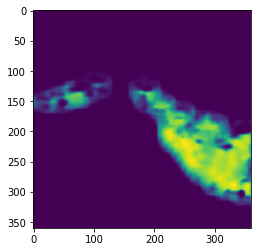

In [ ]:
plt.imshow(predicted_360[0].reshape(360,360))
plt.show()

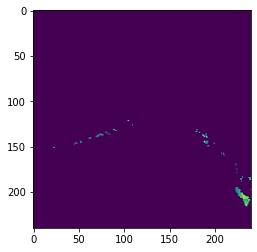

In [ ]:
plt.imshow(data[0].reshape(240,240))
plt.show()

In [ ]:
print(predicted.shape)

(18, 240, 240, 1)


Start of Clipping

(720, 1440)
[0. 0. 0. ... 0. 0. 0.]


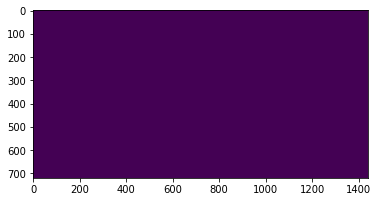

In [ ]:
x = np.zeros((720,1440))
print(x.shape)
print(x[0])
plt.imshow(x)
plt.show()

(720, 1440)
[0. 0. 0. ... 0. 0. 0.]


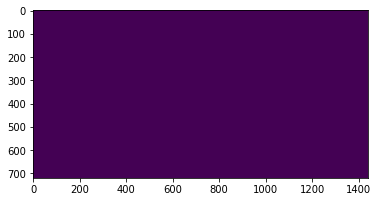

In [ ]:
y = np.zeros((720,1440))
print(y.shape)
print(y[0])
plt.imshow(y)
plt.show()

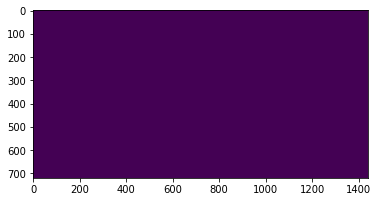

In [ ]:
z = np.zeros((720,1440))
plt.imshow(z)
plt.show()

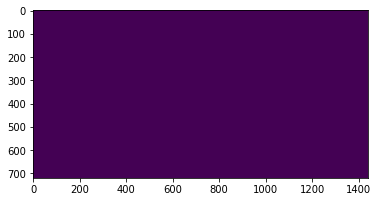

In [ ]:
a = np.zeros((720,1440))
plt.imshow(a)
plt.show()

In [ ]:
u = 0
box = 360
for n in range(0,720,box):
  for m in range(0,1440,box):
    x[n:n+box,m:m+box] = predicted_360[u].reshape(box,box)     
    u = u+1

In [ ]:
x[0:240,0:240] = predicted[0].reshape(240,240)     
x[0:240,240:480] = predicted[1].reshape(240,240)                                           

In [ ]:
u = 0
box = 360
for n in range(0,720,box):
  for m in range(0,1440,box):
    y[n:n+box,m:m+box] = data[u].reshape(box,box)     
    u = u+1

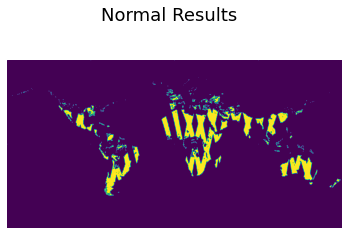

In [ ]:
f = plt.figure() # defining a figure 
plt.imshow(y)
f.suptitle("Normal Results",fontsize=18)
plt.axis("off")
plt.show()

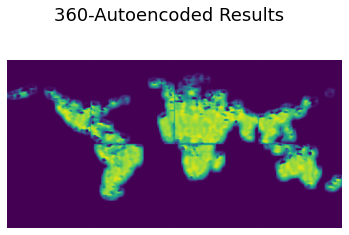

In [ ]:
f = plt.figure() # defining a figure 
plt.imshow(x)
f.suptitle("360-Autoencoded Results",fontsize=18)
plt.axis("off")
plt.show()

In [ ]:
r,f = x.shape
for q in range(r):
  for c in range(f):
    x[q][c] -= 9999.

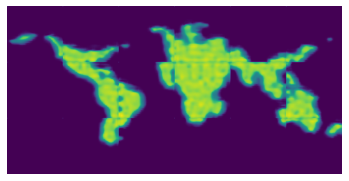

In [ ]:
plt.imshow(x)
plt.axis("off")
plt.show()

In [ ]:
x.shape


(720, 1440)

In [ ]:
with open('/content/drive/Shareddrives/Course1ARam/240test.npy', 'rb') as validation_set:
    a = np.load(validation_set)

In [ ]:
with open('/content/drive/Shareddrives/Course1ARam/test_gaps.npy', 'rb') as validation_set:
    b = np.load(validation_set)

In [ ]:
print(a.shape)
print(b.shape)

(9000, 240, 240, 1)
(9000, 240, 240, 1)


In [ ]:
predicted_240 = autoencoder_240.predict(b)

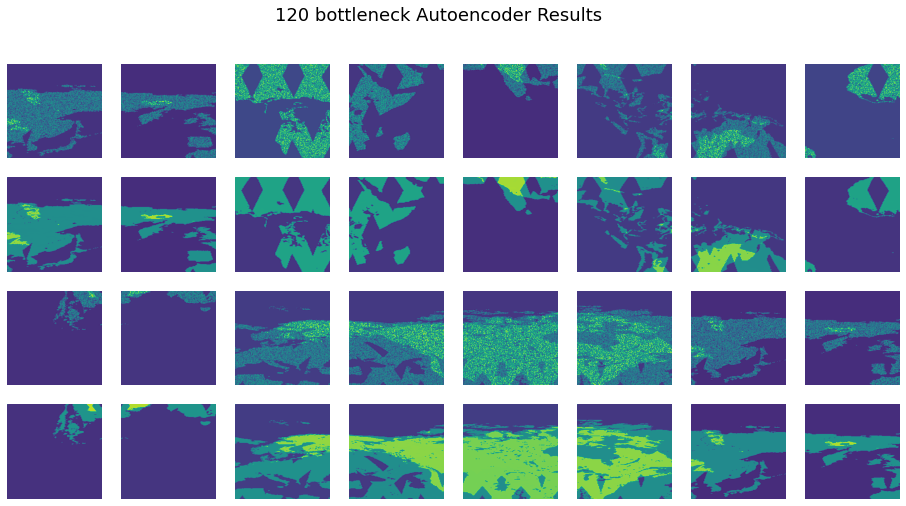

In [ ]:
# Visualize test images with their denoised images

rows = 2 # defining no. of rows in figure
cols = 8 # defining no. of colums in figure
box = 240
f = plt.figure(figsize=(2*cols,2*rows*2)) # defining a figure 

for i in range(rows):
    for j in range(cols): 
        f.add_subplot(rows*2,cols, (2*i*cols)+(j+1)) # adding sub plot to figure on each iteration
        plt.imshow(b[i*cols + j].reshape([box,box])) 
        plt.axis("off")
        
    for j in range(cols): 
        f.add_subplot(rows*2,cols,((2*i+1)*cols)+(j+1)) # adding sub plot to figure on each iteration
        plt.imshow(a[i*cols + j].reshape([box,box])) 
        plt.axis("off")
        
f.suptitle("120 bottleneck Autoencoder Results",fontsize=18)
plt.savefig("autoencoder 120 results.png")

plt.show()

Percentage

In [ ]:
import xarray as xr

In [ ]:
# Recreate the exact same model, including its weights and the optimizer
masterDataset = []
autoencoder_240 = tf.keras.models.load_model('/content/drive/Shareddrives/Course1ARam/240N15Bottleneck/240boxgaps15N_autoencoder')
fill_percentages = []
def processFile(file):
  digestFile(file)
  data = np.asarray(masterDataset)
  print(data.shape)
  sample,x,y = data.shape
  for j in range(sample):
    for k in range(x):
      for l in range(y):
        if (np.isnan(data[j][k][l]) == True):
          data[j][k][l]=-9999
  FormatArray(data)
  print(np.amax(data))
  print(data.shape)
  data = data.reshape([-1,240,240,1])/(np.amax(data))
  predicted = autoencoder_240.predict(data)
  deFormatArray(predicted)
  x = np.zeros((720,1440))
  y = np.zeros((720,1440))
  u = 0
  box = 240
  for n in range(0,720,box):
    for m in range(0,1440,box):
      x[n:n+box,m:m+box] = data[u].reshape(box,box)
      y[n:n+box,m:m+box] = predicted[u].reshape(box,box)
      u = u+1
  return x, y

x, y = processFile('/content/active/2011/ESACCI-SOILMOISTURE-L3S-SSMS-ACTIVE-20110104000000-fv05.2.nc') 
#Doesn't matter what file you open with ds_disk--any file is fine because the data will be overwriten
ds_disk = xr.open_dataset("/content/active/2011/ESACCI-SOILMOISTURE-L3S-SSMS-ACTIVE-20110104000000-fv05.2.nc")
valuesNormal = ds_disk["sm"]
valuesNormal.data = x.reshape(1,720,1440)
valuesNormal.to_netcdf('Normal_240_trail12.nc')
valuesPredicted = ds_disk["sm"]
valuesPredicted.data = y.reshape(1,720,1440)

valuesPredicted.to_netcdf('Predicted_240_trail12.nc')

error: ignored

In [ ]:
masterDataset = []
digestFile('/content/active/2011/ESACCI-SOILMOISTURE-L3S-SSMS-ACTIVE-20110104000000-fv05.2.nc')
data = np.asarray(masterDataset)
sample,x,y = data.shape
for j in range(sample):
  for k in range(x):
    for l in range(y):
      if (np.isnan(data[j][k][l]) == True):
        data[j][k][l]=-9999
FormatArray(data)
print(np.amax(data))
data = data.reshape([-1,240,240,1])

(1, 720, 1440)


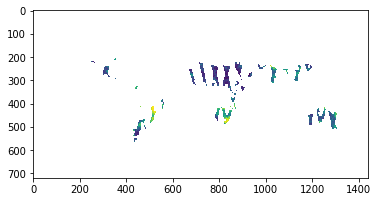

In [ ]:
ds_disk = xr.open_dataset("/content/active/2011/ESACCI-SOILMOISTURE-L3S-SSMS-ACTIVE-20110104000000-fv05.2.nc")
valuesNormal = ds_disk["sm"]
normal = np.asarray(valuesNormal)
print(normal.shape)
plt.imshow(normal.reshape(720, 1440))
plt.show()